In [1]:
import json
import re
from bs4 import BeautifulSoup
import pandas as pd
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import jieba

In [2]:
mydata = pd.read_csv(r'.\data2\data(ch).csv') #导入微博评论数据

# for i in range(8):
#     mydata = mydata.append(mydata)
# mydata.reset_index

number = len(mydata)
index = np.array([i for i in range(number)])
np.random.seed(0)
np.random.shuffle(index)

In [3]:
mydata

,ID,text,score
0,301,是的，Craigslist上也有，这就是原因 好吧 你今天过得怎么样我很好，谢谢你 我来自洛...,3
1,302,稍微移动一下 当你完成了 你今天好吗 我很好，你呢 你来自哪里 来自加州洛杉矶 什么公园 好...,4
2,303,哇好 等你做完了她做完了 好吧 谢谢你！ 你今天过得怎么样，你自己呢 在加州 一切都好，那是...,0
3,304,所以我们今晚就稍微移动一下Xbox Kinect可以感应到你所以她想移动一下 我想是结束了，...,6
4,305,NaN,7
...,...,...,...
182,488,好吧 是的 细 圣费尔南多谷 我真的很喜欢去博物馆的文化，晚上可以去，周围有很多人 交通很分...,0
183,489,好吧 是的 我很好，谢谢 圣路易斯奥比斯波 是的 4年前 一个月想一次 小静鲜是少人的 不错...,3
184,490,好了，你怎么样 北伊利诺斯州 两年半以前 自从我来这里后还没见过 今年晚些时候还没机会回去 ...,2
185,491,我还得把我的猫放上去吗 好吧 是的 不堪重负的 我明天要参加一个葬礼我从医生那里得知我有一些...,8


In [4]:
sentences = mydata["text"]
for i in range(number):
    sentences[i] = str(sentences[i])
label = mydata['score']
for i in range(number):
    if isinstance(label[i],float):
        label[i] = np.ndarray(12)
    elif label[i]=='NA':
        label[i] = np.ndarray(12)
    else:
        ls = []
        ls.append(label[i])
        label[i] = np.array(ls)

for i in range(len(label)):
    if label[i]<=6:
        label[i] = 0
    else:
        label[i] = 1
sentences = np.array(sentences.values)
label = np.array(label.values)
label_ = label[index]
sentences_ = sentences[index]

In [5]:
label

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [6]:
line = int(0.8*number)
test_sentences = sentences_[line:]
train_sentences = sentences_[:line]
test_labels = label_[line:]
train_labels = label_[:line]

In [7]:
def review_to_wordlist(review):
    '''对每条review中的不合法字符进行替换，并进行分词转化成词表'''
    # 剔除非中文字符
    special_regex = re.compile(r"[^\u4e00-\u9fa5]")
    review = special_regex.sub(r" ", review)
    
    review = jieba.lcut(review) #分词
    return review
    # review_text = []
    # for c in review:
    #     if c not in stopwords_list:
    #         review_text.append(c)        
    # return review_text

In [8]:
y_train = train_labels 
train_texts = [] #二维列表，每个元素都是一条评论分词后的词语列表
for i in range(len(train_sentences)):
    train_texts.append(' '.join(review_to_wordlist(train_sentences[i]))) #逐个添加每条评论分词后的词语列表
#显示示例
print('评论内容：')
print(train_texts[0:5])
print('真实标签：')
print(y_train)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\MSI-NB\AppData\Local\Temp\jieba.cache
Loading model cost 0.535 seconds.
Prefix dict has been built successfully.
评论内容：
['我 只是 想 知道 她 看起来 是不是 有点像 真实 的 嗯 像 个 虚拟现实 的 东西 嗯       好 的     好   等 我 做 完 了   好   请   你 能 接受 吗   很 好   纽约   我     年代 搬 到 洛杉矶   但 我 问 你 我 住 过 什么 很多 不同 的 地方   我 想 是 每隔 几年   但是 我 经常 旅行   我 住 在 非洲   我 住 在 西班牙   瑞士   香港   你 喜欢 什么   不同 的 文化   食物   音乐   仪式   一切   颜色 的 气味 让 你 觉得 活着   对不起   我 的 一次 旅行   我 在 肯尼亚 住 了 大约 一年 的 时间 我 想 说 我 爱 骑马 当 你 查看 其他 动物 当 你 伪装 的 马蹄铁 的 香味 可以 接近 动物 很多 近 所以 很 好 看到 红色 橙色 球 日落 和 骑 你 知道 看到 有人 动物 是 的   在 肯尼亚   可能 是 当 我 去   弥赛亚 村   然后 他们 回来 了   我 觉得 生活 很 有趣   有 机会 在 世界各地 不同 的 国家 生活   你 感觉 自己 活着   你 的 所有 感官 都 完全 清醒 了   我醒 了   我 认为 这 不是 很 明确 的   通常 我 将 很快 做出 决定   有时 当 我 觉得       我 打开 鱼缸 屏保   嘿   我 知道 它 不是   离开   你 说 你 放 了 鱼   我 生气 的 时候 会 做 什么   有时候 我 不想 生气   因为 有时候 我 需要 更 耐心 一点   我 猜 你 真的 得 把 自己 放在   别人 的 鞋子   而 不是 你 的 反应 方式   你 必须 有 更 多 的 同理 心   有 多难     不是 我 想 这 就是 为什么

In [9]:
len(train_texts)

149

In [10]:
#对测试集进行处理
y_test = test_labels 
test_texts = [] #二维列表，每个元素都是一条评论分词后的词语列表
for i in range(len(test_sentences)):
    test_texts.append(' '.join(review_to_wordlist(test_sentences[i]))) #逐个添加每条评论分词后的词语列表
print('评论内容：')
print(test_texts[3])
print('真实标签：')
y_test[1]

评论内容：
大家 好   我 是             谢谢 大家 今天 能 来   是 的   好 吧   洛杉矶   我 喜欢 艺术 我 喜欢 天气   我 喜欢 这里 的 人   这是 昂贵 的   雾 霾   交通 拥挤   我 相信 你 能 从 我 的 鞋 看出 我 不是 一个 世界 探险家   不   我 喜欢 我 住 的 地方   我 不 喜欢 离开 我 熟悉 的 环境   我 没有   我 没有 学习   足够 赚 足够 的 钱 来 维持 生计   那 将 是 一份 理想 的 工作   在 中间 的 某个 地方   也许 是 害羞 的   我 只是 试着 冥想   这 并 不 容易   不是 很 擅长   但 我 不常 生气   事实上   我 认为 有   你 能 告诉 我 吗   在 我 的 工作 环境 中   你 会 对 另 一个 员工 发脾气   你 应该 冷静 一点   哦   几天 前 的 一个 夏天   一个 人 的 过度 饮酒   手 和 金钱   不是 我 的 饮料 苏打水   沮丧   人们 不能 很 容易 地 听   好 吧       年前 的 事 我 婚姻 里 的 事   也许 争论 或   是 困难 的   我 当然 可以   我本 可以 在 某些 情况 下 更 小心   其中 一个 是 我 是否 应该   我 在 很小 的 时候 就 结婚 了   我 不想 让 我 女朋友 失望   她 想 结婚   所以 我 不想 伤害 她 的 感情   你 快乐   是 的   我 想 是 我 做 的   不是 吗   我 不是 一个 细心 的 父亲   你 总是 想 成为 最好 的 自己   我 对 自己 很 严格     我 很 累   我 回 想起 每 一种 情况   我 认为 我 自己 没有 正确 地 使用 它们   我 有 一个     岁     岁 的 儿子 他 上个月 刚 结婚 他 过 得 很 好 他 很 快乐   适应 得 很 好 我 女儿     岁   她 在 上学   她 的 表现 也 很 好   所以 我 的 孩子 们 表现 也 很 好   非常 幸运   他们 都 是 这么 好 的 孩子   你 觉得 做 父母 容易 吗   没有   是 一致 的   控制 自己 的 情绪   孩子 们 无条件 的 爱 

1

In [11]:
#建立词库：从所有评论中找出出现频率表最多的5000个词
token=tf.keras.preprocessing.text.Tokenizer(num_words=5000)
token.fit_on_texts(train_texts)
word_index = token.word_index #word_index字典将评论内容中的每一个词都赋予一个数字，数字越小表明该词出现频率越高

In [12]:
#保存tokenizer
import pickle
with open(r'imdb-classify-lstm\tokenizer.pickle', 'wb') as f:
      pickle.dump(token, f)

In [13]:
#根据上面生成的字典word_index将每条评论的每个单词映射为一个数字
train_sequences=token.texts_to_sequences(train_texts) #得到训练集文本文字对应的数字列表
test_sequences=token.texts_to_sequences(test_texts) #得到测试集文本文字对应的数字列表

In [14]:
#显示转换前的文字
print(train_texts[0])

我 只是 想 知道 她 看起来 是不是 有点像 真实 的 嗯 像 个 虚拟现实 的 东西 嗯       好 的     好   等 我 做 完 了   好   请   你 能 接受 吗   很 好   纽约   我     年代 搬 到 洛杉矶   但 我 问 你 我 住 过 什么 很多 不同 的 地方   我 想 是 每隔 几年   但是 我 经常 旅行   我 住 在 非洲   我 住 在 西班牙   瑞士   香港   你 喜欢 什么   不同 的 文化   食物   音乐   仪式   一切   颜色 的 气味 让 你 觉得 活着   对不起   我 的 一次 旅行   我 在 肯尼亚 住 了 大约 一年 的 时间 我 想 说 我 爱 骑马 当 你 查看 其他 动物 当 你 伪装 的 马蹄铁 的 香味 可以 接近 动物 很多 近 所以 很 好 看到 红色 橙色 球 日落 和 骑 你 知道 看到 有人 动物 是 的   在 肯尼亚   可能 是 当 我 去   弥赛亚 村   然后 他们 回来 了   我 觉得 生活 很 有趣   有 机会 在 世界各地 不同 的 国家 生活   你 感觉 自己 活着   你 的 所有 感官 都 完全 清醒 了   我醒 了   我 认为 这 不是 很 明确 的   通常 我 将 很快 做出 决定   有时 当 我 觉得       我 打开 鱼缸 屏保   嘿   我 知道 它 不是   离开   你 说 你 放 了 鱼   我 生气 的 时候 会 做 什么   有时候 我 不想 生气   因为 有时候 我 需要 更 耐心 一点   我 猜 你 真的 得 把 自己 放在   别人 的 鞋子   而 不是 你 的 反应 方式   你 必须 有 更 多 的 同理 心   有 多难     不是 我 想 这 就是 为什么 我 喜欢 旅行 这么 多 因为 你 把 其他 情况 下   上次 是 什么 时候   我 的 沉   上次 我 争论 的 时候   去 回忆 一下   当 有人 不 尊重 我 的 隐私 什么 的 时候 他 就 走 了   我 知道 是 什么 了   是 一个 属于   山达基 的 脸   我 继承 了   我 可能 是 遗传 了 我 母亲 的 免疫系统 紊乱 我 母亲 死 于 狼疮 我 有时 甚至 是 现在 我

In [15]:
#显示转换后的数字列表
print(train_sequences[0])

[1, 29, 16, 11, 25, 357, 377, 769, 597, 2, 522, 52, 101, 3693, 2, 64, 522, 10, 2, 10, 523, 1, 14, 705, 5, 10, 460, 4, 53, 201, 57, 7, 10, 410, 1, 798, 258, 72, 124, 20, 1, 411, 4, 1, 146, 74, 24, 42, 67, 2, 89, 1, 16, 3, 1146, 309, 70, 1, 148, 92, 1, 146, 6, 1147, 1, 146, 6, 1148, 3694, 3695, 4, 18, 24, 67, 2, 327, 328, 172, 3696, 142, 2654, 2, 2655, 30, 4, 54, 618, 741, 1, 2, 131, 92, 1, 6, 2107, 146, 5, 335, 303, 2, 114, 1, 16, 27, 1, 165, 1778, 51, 4, 3697, 173, 649, 51, 4, 3698, 2, 3699, 2, 3700, 48, 494, 649, 42, 1530, 21, 7, 10, 115, 3701, 3702, 1531, 1532, 9, 546, 4, 11, 115, 358, 649, 3, 2, 6, 2107, 39, 3, 51, 1, 22, 3703, 3704, 105, 23, 461, 5, 1, 54, 62, 7, 127, 12, 336, 6, 1779, 67, 2, 431, 62, 4, 68, 34, 618, 4, 2, 117, 3705, 32, 299, 1364, 5, 2656, 5, 1, 55, 17, 37, 7, 2108, 2, 139, 1, 337, 547, 432, 81, 76, 51, 1, 54, 1, 462, 548, 549, 447, 1, 11, 46, 37, 195, 4, 27, 4, 1240, 5, 3706, 1, 138, 2, 33, 35, 14, 24, 239, 1, 202, 138, 36, 239, 1, 109, 47, 571, 132, 1, 203, 4, 4

In [16]:
#确定训练集与测试集中的最长评论长度
reviews_lens = map(len,train_texts+test_texts) #确定最长评论词数
reviews_len_max=max(reviews_lens)
reviews_len_max=500

In [17]:
#将每条评论都变为与最长评论相同长度的数字列表，不足的部分补0
#padding='post'需要补0时在序列结尾补；truncating='post'需要截断时从结尾截断；maxlen是序列最大长度
#还有一种方式,padding='pre'需要补0时在序列开头补；truncating='pre'需要截断时从开头截断
x_train=tf.keras.preprocessing.sequence.pad_sequences(train_sequences,padding='post',truncating='post',maxlen=reviews_len_max)
x_test=tf.keras.preprocessing.sequence.pad_sequences(test_sequences,padding='post',truncating='post',maxlen=reviews_len_max)

In [18]:
print(x_train)
print(y_train)

[[   1   29   16 ... 3721  412    3]
 [  44   23   48 ...    0    0    0]
 [   4   48  411 ... 1251    2   33]
 ...
 [2909  279   10 ... 3622    1 3081]
 [ 676    1  393 ...  701  772    4]
 [2102   13  801 ...   60  378   26]]
[0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0
 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0
 1]


In [19]:
model=tf.keras.models.Sequential([
    #嵌入层：将已经数字化的影评转化为向量
    #向量化目的：实现将词语嵌入多维矩阵，使得语义相近的词语，在空间距离上更接近
    #设置输出的词向量维度为64，输入维度5000，每条评论长度与最长评论相同
    tf.keras.layers.Embedding(output_dim=64,input_dim=5000,input_length=reviews_len_max),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), #RNN的双向封装器，用于对序列进行前向和后向计算
    tf.keras.layers.Dense(64, activation='relu'), #隐藏层，64个神经元，激活函数为relu函数
    #Dropout层以指定的丢弃概率随机丢弃上一层神经元
    tf.keras.layers.Dropout(0.5), #防止过拟合：随机选择丢弃20%神经元
    tf.keras.layers.Dense(1,activation='sigmoid') #输出层
])



In [20]:
#lr指学习率，epsilon指定一个较小的数代替0，防止实现过程除以0
#decay为学习率在每轮训练的衰减因子，取值范围[0,1]，0代表学习率在训练过程中保持不变
#经衰减后的学习率的计算公式为lr_i = lr_start * 1.0 / (1.0 + decay*i) , i为迭代周期，lr_start是lr的初始值

adam = tf.keras.optimizers.Adam(lr=0.05,epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, #指定优化器——adam
              loss='binary_crossentropy', #指定损失函数——对数损失函数(针对二分类问题)
              metrics=['accuracy']) #设置模型检验的方法——准确度

In [21]:
len(x_train),len(y_train)

(149, 149)

In [22]:
#函数返回：训练过程的数据记录history
history = model.fit(x_train,y_train, #输入训练集的文字和标签
                    validation_split=0.2, #取训练集30%数据当验证集
                     epochs=6,batch_size=10,verbose=1,shuffle=True)
#verbose=0表示不在标准输出流输出日志信息，verbose=1表示输出进度条记录，verbose=2表示为每个epoch输出一行记录

Epoch 1/6
12/12 [==============================] - 2s 155ms/step - loss: 1.1372 - accuracy: 0.5126 - val_loss: 0.8670 - val_accuracy: 0.4000
Epoch 2/6
12/12 [==============================] - 1s 94ms/step - loss: 1.0679 - accuracy: 0.5294 - val_loss: 0.6793 - val_accuracy: 0.5333
Epoch 3/6
12/12 [==============================] - 1s 96ms/step - loss: 0.7013 - accuracy: 0.4874 - val_loss: 0.6683 - val_accuracy: 0.6333
Epoch 4/6
12/12 [==============================] - 1s 98ms/step - loss: 0.6553 - accuracy: 0.5462 - val_loss: 0.8163 - val_accuracy: 0.3667
Epoch 5/6
12/12 [==============================] - 1s 97ms/step - loss: 0.5206 - accuracy: 0.7647 - val_loss: 1.0128 - val_accuracy: 0.5000
Epoch 6/6
12/12 [==============================] - 1s 96ms/step - loss: 0.5678 - accuracy: 0.7479 - val_loss: 1.0509 - val_accuracy: 0.4667


In [23]:
# #训练耗时较长，训练完后保存一次数据
# model.save_weights('./imdb-classify-lstm/finalmodel_weibo2')

In [24]:
#恢复训练的数据
model.load_weights('./imdb-classify-lstm/finalmodel_weibo2')

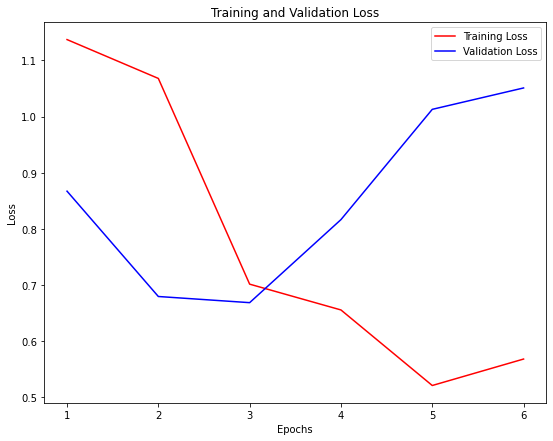

In [25]:
#trainRecord.history为字典对象，包含训练过程中的loss和测量指标等记录项
train_acc = history.history['accuracy'] #模型在训练集上的精度
val_acc = history.history['val_accuracy'] #模型在验证集上的精度
train_loss = history.history['loss'] #模型在训练集上的损失值
val_loss = history.history['val_loss'] #模型在验证集上的损失值

epochs=range(1,len(train_acc)+1) #设置横坐标epochs的计算方法
plt.figure(figsize=(9,7)) #设置图形的宽度和高度
#绘制一条折线，以训练轮数epochs作为x轴，训练集的损失值train_loss作为y轴，线条颜色为红色，线条标签为'Training Loss'
plt.plot(epochs,train_loss,'r',label='Training Loss') 
#绘制一条折线，以训练轮数epochs作为x轴，验证集的损失值val_loss作为y轴，线条颜色为蓝色，线条标签为'Validation Loss'
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss') #图形的标题
plt.xlabel('Epochs') #横坐标表示经过几轮迭代
plt.ylabel('Loss') #纵坐标表示损失值
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

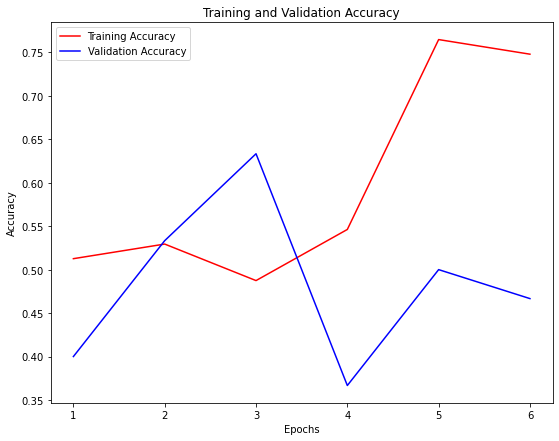

In [26]:
plt.clf()  #清除所有轴，保持窗口打开
plt.figure(figsize=(9,7)) #设置图形的宽度和高度
plt.plot(epochs,train_acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs') #横坐标表示经过几轮迭代
plt.ylabel('Accuracy') #纵坐标表示准确度
plt.legend()
plt.show()

In [27]:
#输入数据和标签，输出损失值和准确度
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=1)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2/2 [==============================] - 0s 8ms/step - loss: 0.9192 - accuracy: 0.7105
Test Loss: 0.9192383289337158
Test Accuracy: 0.7105262875556946


In [28]:
predictions=model.predict(x_test) #输入测试集，返回预测结果
predictions #显示

array([[9.5497614e-01],
       [9.8750311e-01],
       [9.3413764e-01],
       [1.7580718e-01],
       [1.6482091e-01],
       [7.4878037e-03],
       [1.1962240e-05],
       [7.2514743e-02],
       [6.5609813e-04],
       [9.9514240e-01],
       [6.5015364e-01],
       [9.6018380e-01],
       [6.5270716e-01],
       [9.4375062e-01],
       [6.9481027e-01],
       [3.7447453e-02],
       [1.5010834e-03],
       [8.0733597e-01],
       [5.1400065e-02],
       [2.3307294e-02],
       [9.7445112e-01],
       [1.3279915e-03],
       [4.7971845e-01],
       [1.2158942e-01],
       [9.3575311e-01],
       [1.0553926e-02],
       [9.7090673e-01],
       [9.6141791e-01],
       [9.4301552e-01],
       [1.0000000e+00],
       [9.9984306e-01],
       [4.0037036e-03],
       [8.3658099e-04],
       [7.1555090e-01],
       [4.0522218e-02],
       [9.9833083e-01],
       [4.9407572e-02],
       [4.0788561e-02]], dtype=float32)

In [29]:
#将预测结果写入csv文件，包含评论内容，真实标签，预测标签
with open(r'.\prediction.csv', 'w',encoding='utf-8-sig',newline='') as csvfile:
    fieldnames = ['评论内容', '真实标签','预测标签']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(test_texts)):
        writer.writerow({'评论内容': test_texts[i], '真实标签': y_test[i],'预测标签': [round(j,2) for j in predictions[i][:8]]})

In [30]:
#读取保存的csv文件并展示
df = pd.read_csv(r'.\prediction.csv',encoding='utf-8-sig')
df

,评论内容,真实标签,预测标签
0,设备 虚拟 人类 和 你 聊天 一会儿 等 她 说完 好 吧 你 还好 ...,0,[0.95]
1,她 能 看见 我 吗 好 吧 好 吧 好 吧 请 你 能 接受 吗 ...,1,[0.99]
2,我 想 知道 人们 是否 真的 喜欢 理解 它 你 知道 我 的 意思 就 像 一个...,1,[0.93]
3,大家 好 我 是 谢谢 大家 今天 能 来 是 的 好 ...,1,[0.18]
4,你 所 知道 的 是 的 我 很 好 佛罗里达 大约 两三个 月 前 我...,0,[0.16]
5,好 吧 等 她 做 完 了 她 就 是 的 好 谢谢 你 埃尔塞 贡多 ...,0,[0.01]
6,好 吧 好 吧 是 的 很 好 纽约 把 音量 调大 一点 改变 很...,0,[0.0]
7,好 吧 谢谢 你 是 的 我 很 好 你好 吗 加州 是 的 天气 ...,0,[0.07]
8,好酷 我 做 得 很 好 你 呢 但 我 连 英格尔 伍德 都 背 不好 我...,0,[0.0]
9,好 吧 谢谢 你 请 你 还好 是 的 好 吧 除了 我 的 喉炎 ...,0,[1.0]


In [31]:
def display_test_sentiment(text):
    #显示要预测的文本内容
    print(text)
    #数据规范化
    newtext=review_to_wordlist(text)
    #将文本转换为数字序列
    input_seq=token.texts_to_sequences([newtext])
    #将序列填充或截断为固定长度的序列
    pad_input_seq=tf.keras.preprocessing.sequence.pad_sequences(input_seq,
                                                   padding='post',
                                                   truncating='post',
                                                   maxlen=reviews_len_max)
    #使用训练好的模型进行预测
    pred=model.predict(pad_input_seq)
    score = "{:.2%}".format(pred[0][0])
    #打印预测值
    if pred[0][0]>0.5:
        result=True
    else:
        result=False
    # print('结论',preValue)
    
    return score,result

In [37]:
text =  """
我感觉我真的活不下去了。这次没有一丝留恋，没有一丝求生欲，我已经感受到了冰冷的水没过我的头顶，看到死神向我招手的样子。
"""
display_test_sentiment(text)


我感觉我真的活不下去了。这次没有一丝留恋，没有一丝求生欲，我已经感受到了冰冷的水没过我的头顶，看到死神向我招手的样子。



('99.05%', True)

In [38]:
text =  """
"[cp]回家时间过得好快，一转眼马上又要回上海了！安慰自己分离是为了更好的相聚。 ​​​[/cp]"
"适才骑了个车去车站，遇两车挡道，遂以脚撑地从夹缝中缓慢通行，再蹬感觉不太对劲，越蹬越重，后轮涩住，难以前进，多次尝试并无好转。心下一惊，又想：算了算了，大不了不骑了。一边这么想着一边下地打算靠边停车，转念又觉车站还远，索性又跨上车，心内默念阿弥陀佛阿弥陀佛，拜托不要跟着我……🙏🙏车轮竟神奇地轻快起来，一路小心翼翼……[允悲][允悲][允悲]阿弥陀佛🙏"
"""
display_test_sentiment(text)


"[cp]回家时间过得好快，一转眼马上又要回上海了！安慰自己分离是为了更好的相聚。 ​​​[/cp]"
"适才骑了个车去车站，遇两车挡道，遂以脚撑地从夹缝中缓慢通行，再蹬感觉不太对劲，越蹬越重，后轮涩住，难以前进，多次尝试并无好转。心下一惊，又想：算了算了，大不了不骑了。一边这么想着一边下地打算靠边停车，转念又觉车站还远，索性又跨上车，心内默念阿弥陀佛阿弥陀佛，拜托不要跟着我……🙏🙏车轮竟神奇地轻快起来，一路小心翼翼……[允悲][允悲][允悲]阿弥陀佛🙏"



('0.25%', False)

In [35]:
text =  """
"适才骑了个车去车站，遇两车挡道，遂以脚撑地从夹缝中缓慢通行，再蹬感觉不太对劲，越蹬越重，后轮涩住，难以前进，多次尝试并无好转。心下一惊，又想：算了算了，大不了不骑了。一边这么想着一边下地打算靠边停车，转念又觉车站还远，索性又跨上车，心内默念阿弥陀佛阿弥陀佛，拜托不要跟着我……🙏🙏车轮竟神奇地轻快起来，一路小心翼翼……[允悲][允悲][允悲]阿弥陀佛🙏"
"""
display_test_sentiment(text)


"适才骑了个车去车站，遇两车挡道，遂以脚撑地从夹缝中缓慢通行，再蹬感觉不太对劲，越蹬越重，后轮涩住，难以前进，多次尝试并无好转。心下一惊，又想：算了算了，大不了不骑了。一边这么想着一边下地打算靠边停车，转念又觉车站还远，索性又跨上车，心内默念阿弥陀佛阿弥陀佛，拜托不要跟着我……🙏🙏车轮竟神奇地轻快起来，一路小心翼翼……[允悲][允悲][允悲]阿弥陀佛🙏"



('76.38%', True)